In [ ]:
#import libraries
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#In th case that you run across an errors run the following
#!pip install yfinance
#!pip install flask
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

In [ ]:
#Get the stock quote

#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-17')
#Show the data	
df = yf.Ticker("AAPL")
df= df.history(period="max")
df= df.loc["2015-01-01":].copy()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,25.028560,25.039795,24.120800,24.565693,212818400,0.0,0.0
2015-01-05 00:00:00-05:00,24.332020,24.412910,23.684904,23.873646,257142000,0.0,0.0
2015-01-06 00:00:00-05:00,23.938801,24.138777,23.509636,23.875887,263188400,0.0,0.0
2015-01-07 00:00:00-05:00,24.087098,24.311791,23.974752,24.210680,160423600,0.0,0.0
2015-01-08 00:00:00-05:00,24.543225,25.199328,24.424136,25.140907,237458000,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-27 00:00:00-04:00,159.940002,160.770004,157.869995,158.279999,52390300,0.0,0.0
2023-03-28 00:00:00-04:00,157.970001,158.490005,155.979996,157.649994,45992200,0.0,0.0
2023-03-29 00:00:00-04:00,159.369995,161.050003,159.350006,160.770004,51305700,0.0,0.0


In [ ]:
#Get numer of rows and columns in the dataset
df.shape

(2076, 7)

Text(0, 0.5, 'Close Price USD$')

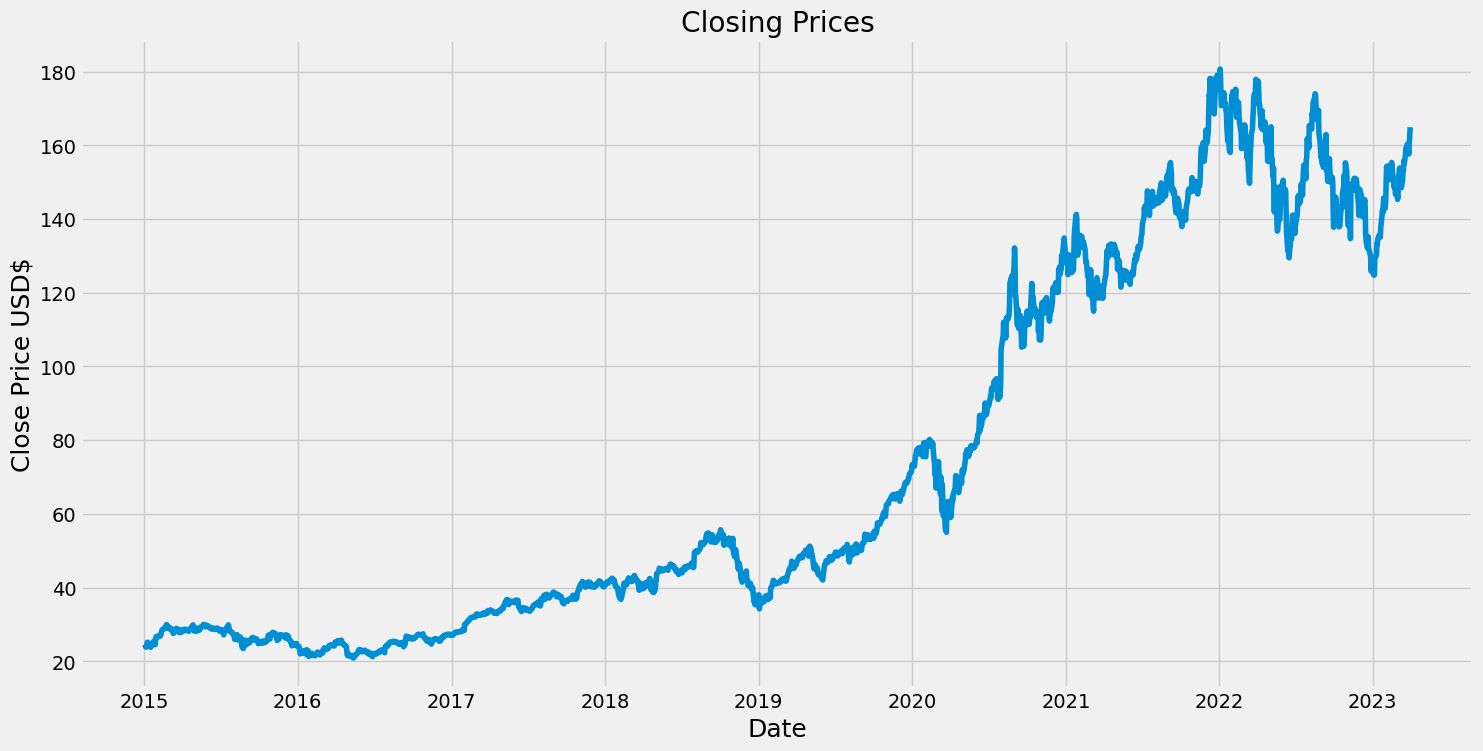

In [ ]:
#Visualizing the closing dates
plt.figure(figsize=(16,8))
plt.title('Closing Prices')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18 )
plt.ylabel('Close Price USD$', fontsize= 18 )

In [ ]:
#Creating a new data frame with only the close column
data= df.filter(['Close'])
#convert the dataframe to a numpy array
dataset= data.values
# Get number of rows tp train the LSTM model
#training the model with 80% of the dataset and rounding it off
training_data_len = math.ceil(len(dataset) * 0.80)


training_data_len

1661

In [ ]:
#Scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02304537],
       [0.01871468],
       [0.01872871],
       ...,
       [0.87538332],
       [0.88533318],
       [0.90122793]])

In [ ]:
#Create the training data set
#Create the scaled training data set

train_data= scaled_data[0: training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.02304537, 0.01871468, 0.01872871, 0.02082377, 0.02664494,
       0.02681371, 0.02293291, 0.02429681, 0.02370624, 0.01951615,
       0.01834906, 0.02218767, 0.02335472, 0.02736211, 0.0281776 ,
       0.02834632, 0.02277822, 0.03145376, 0.03650157, 0.034055  ,
       0.03612195, 0.03615008, 0.0374296 , 0.03862951, 0.03720378,
       0.03831896, 0.04156569, 0.04560294, 0.04783333, 0.04870854,
       0.04976728, 0.05102364, 0.05064248, 0.05212469, 0.05706545,
       0.05589377, 0.05112243, 0.0534234 , 0.0506566 , 0.0515459 ,
       0.05192707, 0.0507695 , 0.04776277, 0.04803097, 0.04879325,
       0.04508067, 0.04187629, 0.04499597, 0.04378195, 0.04570173,
       0.04865208, 0.05067072, 0.04930145, 0.04704285, 0.04889209,
       0.04815802, 0.04348549, 0.04469952, 0.04330197, 0.04770631])]
[0.044967730824421376]

[array([0.02304537, 0.01871468, 0.01872871, 0.02082377, 0.02664494,
       0.02681371, 0.02293291, 0.02429681, 0.02370624, 0.01951615,
       0.01834906, 0.02218767, 0.0

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train= np.array(x_train) 
y_train= np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape

(1601, 60, 1)

In [ ]:
#Building The LSTM Model.    
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 #The optimizer improves on the loss function where as the loss function is used to measure how well the mdel did on training

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1601/1601 [==============================] - 55s 32ms/step - loss: 9.7097e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2504
test_data =scaled_data[training_data_len - 60: , : ]
#Create the data sets x_tests % y_tests
x_test = []
y_test = dataset[training_data_len: ,: ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])


In [ ]:
#from flask_ngrok import run_with_ngrok
#from flask import Flask, render_template, request
#app=Flask(__name__)
#run_with_ngrok (app)
#@app.route("/",methods=['GET', 'POST'])
#def index():
   # result = None
    #if request.method == 'POST':
        # Get the user input from the form
     #   user_input = request.form['user-input']
        # Call your function with the user input
      #  result = valid
    # Render the template with the form and result
    #eturn render_template('index.html', result=result)

# Run the Flask app
#app.run()

In [ ]:
#Get the quote
#apple_quote =web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-17')
apple_quote=yf.Ticker("AAPL")
apple_quote=apple_quote.history(period="max")
#loc method used to take data after 2015
apple_quote = apple_quote.loc["2015-01-01":].copy()
#create new data frame
new_df= apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days= new_df[-60:].values
#scale data to be values btn 0 & 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create emty list
X_test=[]
#Append the past 60 days to 
X_test.append(last_60_days_scaled) 
#Convert  the x_test to a numpy array
X_test = np.array(X_test)
#reshape data to 3 dimensions
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price= model.predict(X_test)
#undo scaling
pred_price =  scaler.inverse_transform(pred_price)
print(pred_price) 

1/1 [==============================] - 0s 27ms/step
[[164.14742]]


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

67/67 [==============================] - 1s 19ms/step


In [ ]:
# Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

9.069159980341128

<ipython-input-35-c6ca2ce5b566>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


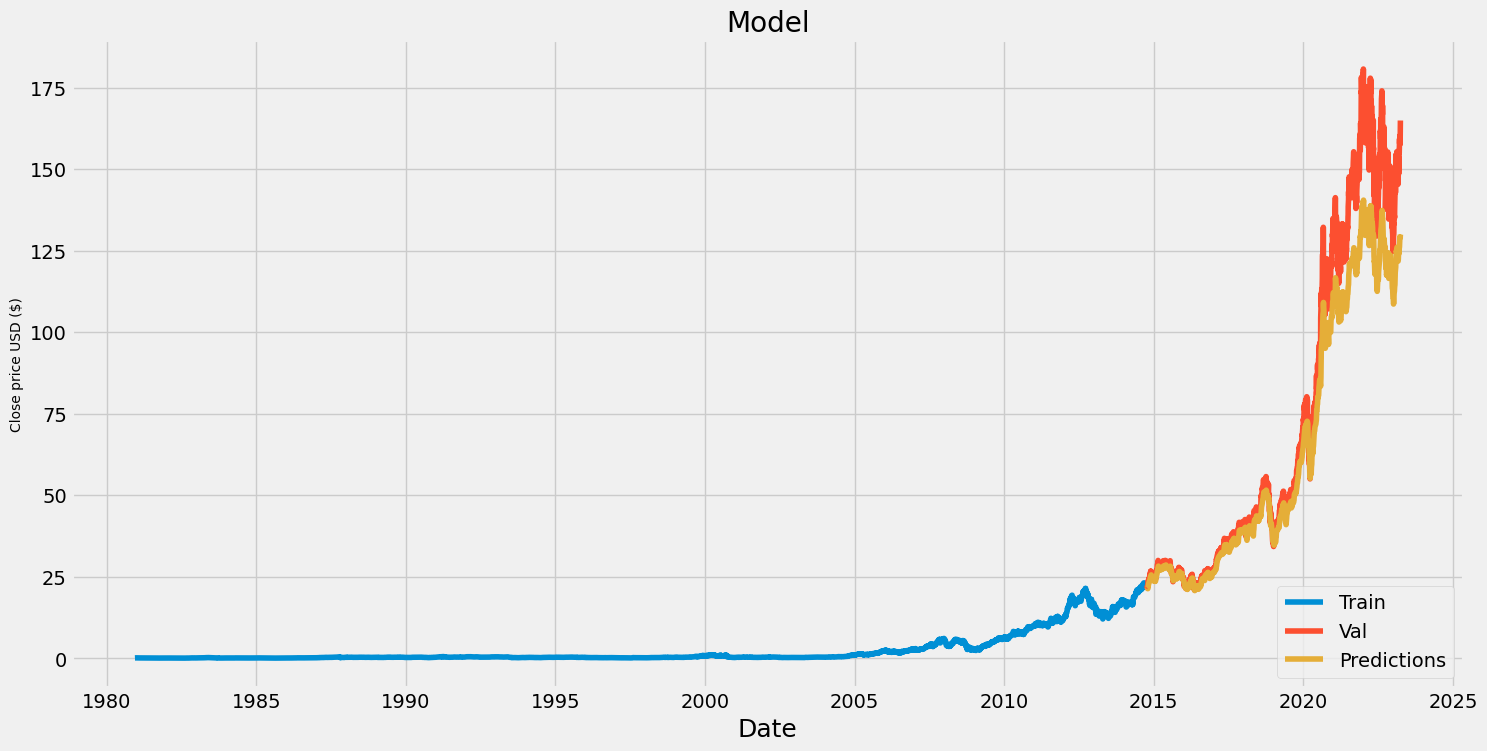

In [ ]:
#Plot the data
train = data[0: training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=10)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show actual closing prices
valid

,Close,Predictions
Date,,
2014-10-10 00:00:00-04:00,22.535616,21.760483
2014-10-13 00:00:00-04:00,22.329792,21.811701
2014-10-14 00:00:00-04:00,22.092649,21.804518
2014-10-15 00:00:00-04:00,21.821939,21.732405
2014-10-16 00:00:00-04:00,21.535570,21.601242
...,...,...
2023-03-27 00:00:00-04:00,158.279999,129.103134
2023-03-28 00:00:00-04:00,157.649994,129.158981
2023-03-29 00:00:00-04:00,160.770004,128.994827


In [ ]:
#!ngrok authtoken 24BG9WPMvrVfvYYnLpI4YmGSLF1_rDrYXzG9f1Z5UkdHXQGo

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
